In [9]:
#basic lib imports
import pandas as pd
import os.path as path
import numpy as np

#sklearn imports (model lib)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

#plotting lib
import matplotlib.pyplot as plt

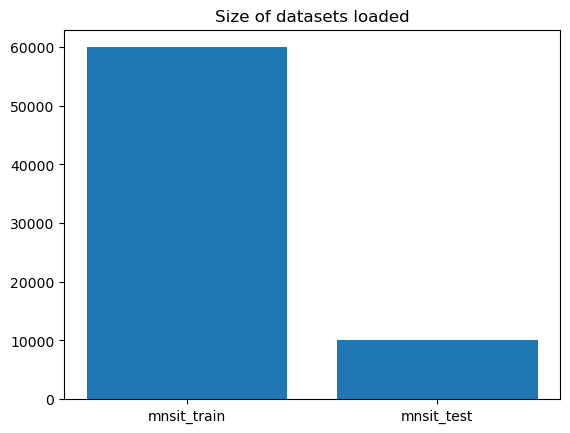

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [10]:
#loading datasets
data_train = pd.read_csv(path.relpath("../data/mnist_train.csv"), header=None)
data_test = pd.read_csv(path.relpath("../data/mnist_test.csv"), header=None)

#plotting for checking loading
fig, ax = plt.subplots()

datasets_names = ("mnsit_train", "mnsit_test")
counts = (len(data_train), len(data_test))
ax.bar(datasets_names, counts)
ax.set_title('Size of datasets loaded')

plt.show()
data_train.describe()

In [11]:
#analyze dataset
#data_train.describe()
n_pixel = data_train.columns #labels
pixel = np.array(data_train.loc[:, 1:].values) #pixels


#plt.scatter(np.count_nonzero(pixel.flat), np.count_nonzero(pixel.flat))
#plt.show()

In [17]:
#Set train X and Y values
X_train = np.array(data_train.loc[:, 1:].values)
Y_train = np.array(data_train.loc[:, 0].values)

#Naive Bayes SciKit Model
gnb = GaussianNB()
classifier = gnb.fit(X_train, Y_train)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (559635995.py, line 5)